In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')  

In [4]:
# Tabla de frecuencias para la columna 'category'
frecuencia_categorias = df['category'].value_counts()

# Mostrar las 5 categorías más listadas
top_5_categorias = frecuencia_categorias.head(5)
print("Las 5 categorías más listadas son:")
print(top_5_categorias)

Las 5 categorías más listadas son:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


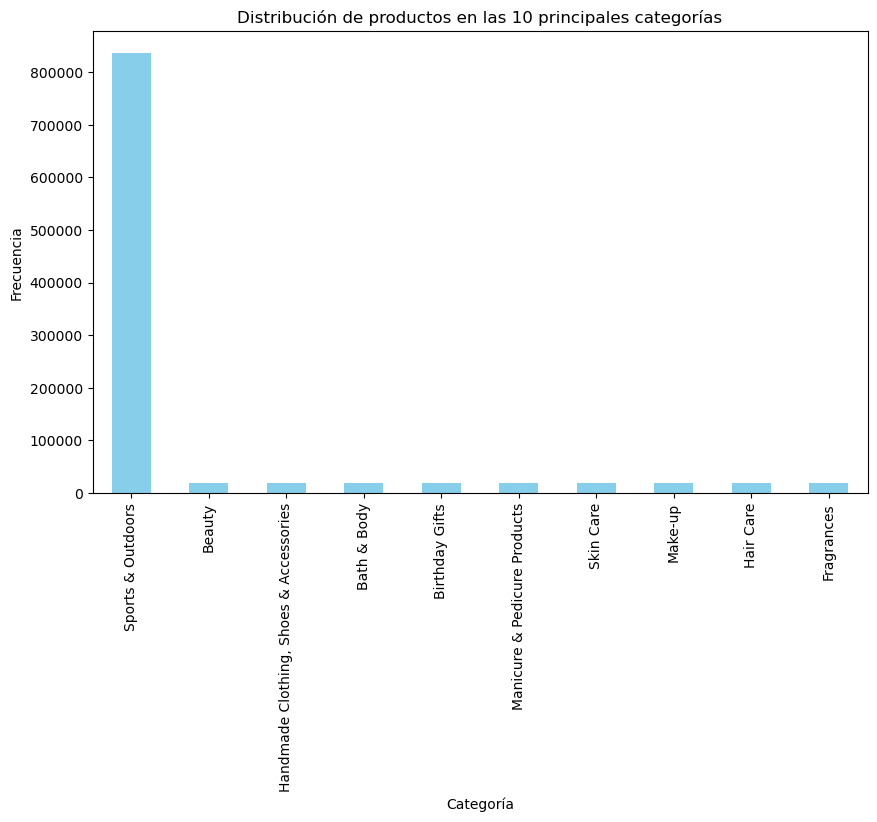

In [14]:
# Mostrar las 10 categorías más listadas
top_10_categorias = frecuencia_categorias.head(10)

# Visualización ajustada: Distribución de productos en las 10 principales categorías (Gráfico de barras)
plt.figure(figsize=(10, 6))
top_10_categorias.plot(kind='bar', color='skyblue')
plt.title('Distribución de productos en las 10 principales categorías')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()


In [18]:
# Filtrar los valores nulos o faltantes en la columna 'price'
df = df.dropna(subset=['price'])

# Considerar solo precios positivos (descartar valores negativos si existen)
df = df[df['price'] > 0]

# 1. Medidas de centralidad
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  # La moda puede tener múltiples valores, tomamos el primero

print("Medidas de Centralidad:")
print(f"Promedio (Media): {mean_price:.2f}")
print(f"Mediana: {median_price:.2f}")
print(f"Moda: {mode_price:.2f}")

Medidas de Centralidad:
Promedio (Media): 89.24
Mediana: 19.09
Moda: 9.99


In [20]:
# 2. Medidas de dispersión
variance_price = df['price'].var()
std_dev_price = df['price'].std()
price_range = df['price'].max() - df['price'].min()
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1  # Rango intercuartílico

print("\nMedidas de Dispersión:")
print(f"Varianza: {variance_price:.2f}")
print(f"Desviación estándar: {std_dev_price:.2f}")
print(f"Rango: {price_range:.2f}")
print(f"Rango Intercuartílico (IQR): {iqr:.2f}")


Medidas de Dispersión:
Varianza: 119446.40
Desviación estándar: 345.61
Rango: 99999.99
Rango Intercuartílico (IQR): 36.00


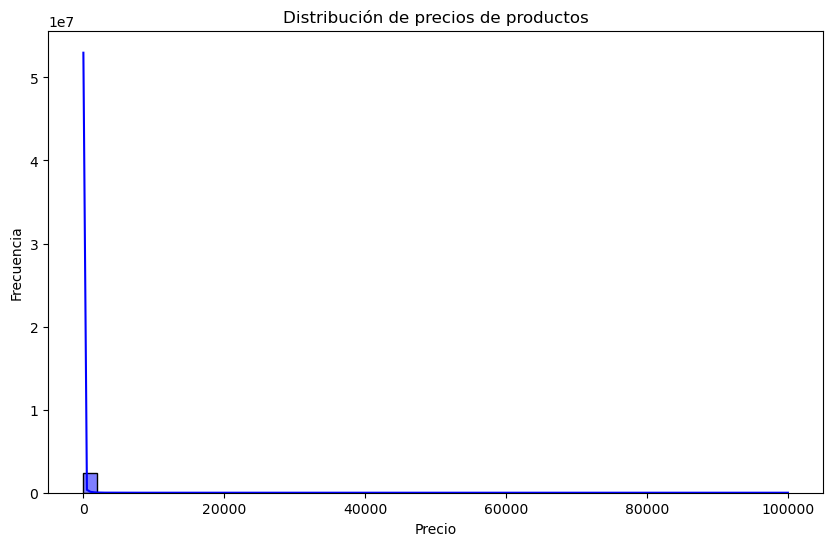

In [23]:
# 3. Visualizaciones

# a. Histograma de la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Distribución de precios de productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

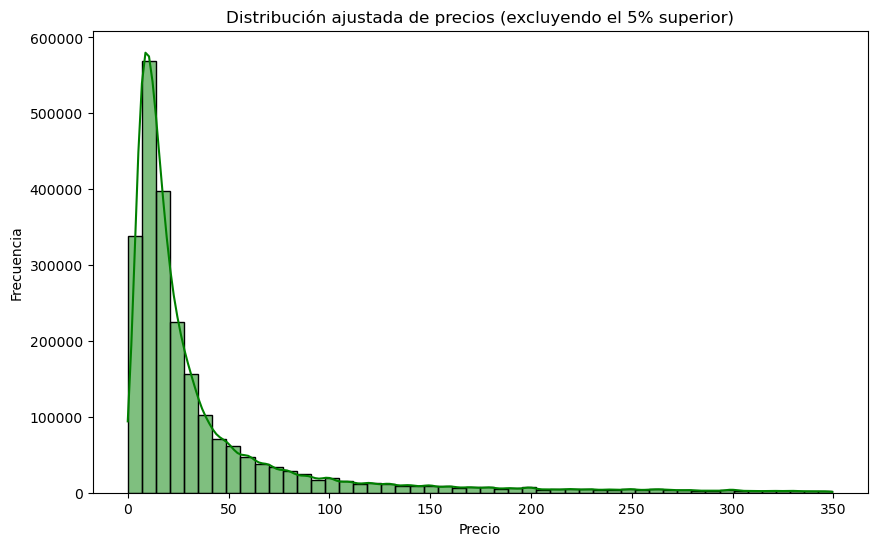

In [25]:
# Histograma ajustado (excluyendo valores extremos)
plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] < df['price'].quantile(0.95)]['price'], bins=50, kde=True, color='green')
plt.title('Distribución ajustada de precios (excluyendo el 5% superior)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

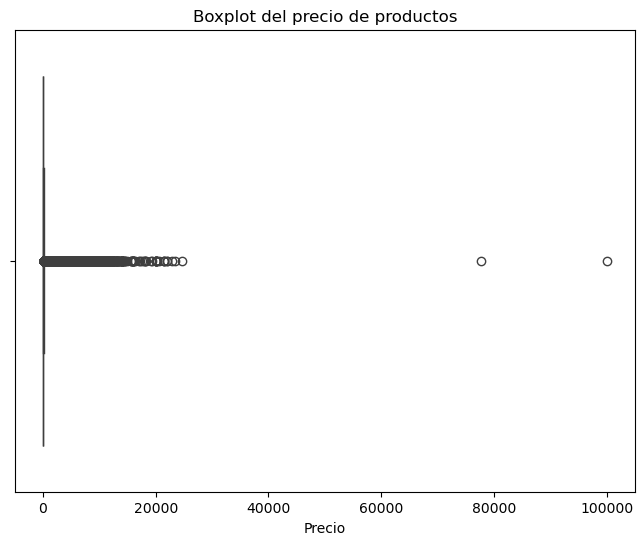

In [27]:
# b. Gráfico de caja para visualizar la dispersión y los valores atípicos
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot del precio de productos')
plt.xlabel('Precio')
plt.show()

In [33]:
print(df.columns)

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


In [35]:
# 1. Medidas de centralidad para la columna 'stars'
mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()[0]  # La moda puede tener múltiples valores, se toma el primero

print("Medidas de Centralidad:")
print(f"Promedio (Media): {mean_stars:.2f}")
print(f"Mediana: {median_stars:.2f}")
print(f"Moda: {mode_stars:.2f}")


Medidas de Centralidad:
Promedio (Media): 2.15
Mediana: 0.00
Moda: 0.00


In [39]:
# 2. Medidas de dispersión para la columna 'stars'
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
q1_stars = df['stars'].quantile(0.25)
q3_stars = df['stars'].quantile(0.75)
iqr_stars = q3_stars - q1_stars  # Rango intercuartílico
print("\nMedidas de Dispersión:")
print(f"Varianza: {variance_stars:.2f}")
print(f"Desviación estándar: {std_dev_stars:.2f}")
print(f"Rango Intercuartílico (IQR): {iqr_stars:.2f}")



Medidas de Dispersión:
Varianza: 4.82
Desviación estándar: 2.19
Rango Intercuartílico (IQR): 4.40


In [41]:
# 3. Forma de la distribución
skewness_stars = skew(df['stars'].dropna())
kurtosis_stars = kurtosis(df['stars'].dropna())

print("\nForma de la Distribución:")
print(f"Sesgo (Skewness): {skewness_stars:.2f}")
print(f"Curtosis (Kurtosis): {kurtosis_stars:.2f}")



Forma de la Distribución:
Sesgo (Skewness): 0.08
Curtosis (Kurtosis): -1.93


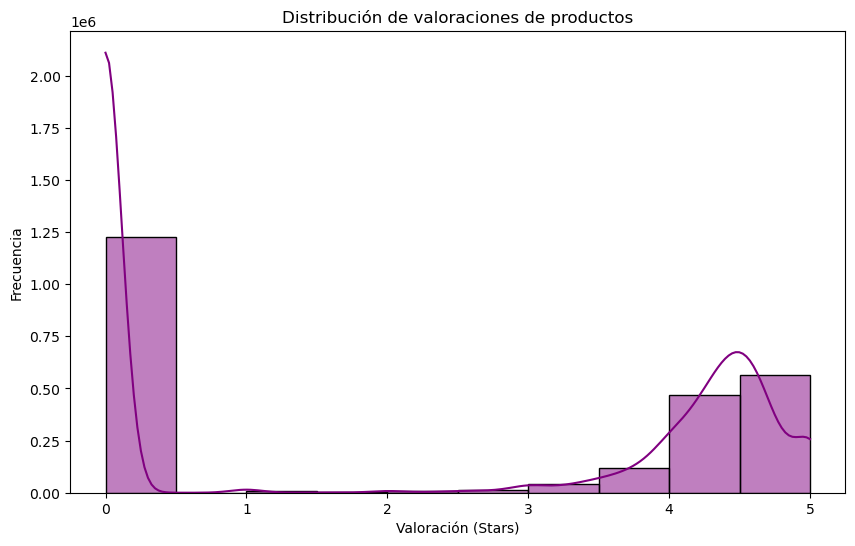

In [44]:
# 4. Visualización de la distribución de las valoraciones

# Histograma de la distribución de las valoraciones
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'].dropna(), bins=10, kde=True, color='purple')
plt.title('Distribución de valoraciones de productos')
plt.xlabel('Valoración (Stars)')
plt.ylabel('Frecuencia')
plt.show()